In [1]:
import numpy as np
import pandas as pd
import os
import pandasql
from pandasql import sqldf
from matplotlib import pyplot as plt
import seaborn as sns
import string
%matplotlib inline
#Just importing everything that I think we might possibly need

In [2]:
pysqldf = lambda q: sqldf(q, globals())

# Q5: Is there an ideal Month to release a movie?

In [3]:
#Importing the data we plan on using
tn_df = pd.read_csv("cleaneddata/tn_movies.csv")
imdb_df = pd.read_csv("cleaneddata/imdb_main_table.csv")

In [4]:
# Merges to form the dataset we are planning on using
relation_df = pd.merge(left=imdb_df[['primary_title','original_title','averagerating','numvotes','start_year']]\
                        , right=tn_df, left_on='primary_title', right_on='movie',how='inner')

# This changes budgets into workable numbers
relation_df['production_budget'] = relation_df['production_budget'].apply(lambda x: x/1000000)
relation_df['domestic_gross'] = relation_df['domestic_gross'].apply(lambda x: x/1000000)
relation_df['worldwide_gross'] = relation_df['worldwide_gross'].apply(lambda x: x/1000000)

# This changes to datetime and drops any duplicates
relation_df['release_date'] = pd.to_datetime(relation_df['release_date'])
relation_df = relation_df.drop_duplicates(['primary_title','original_title','release_date','production_budget'], keep='first')
print(relation_df.info())
relation_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 0 to 2321
Data columns (total 12 columns):
primary_title        2173 non-null object
original_title       2173 non-null object
averagerating        2173 non-null float64
numvotes             2173 non-null int64
start_year           2173 non-null int64
Unnamed: 0           2173 non-null int64
id                   2173 non-null int64
release_date         2173 non-null datetime64[ns]
movie                2173 non-null object
production_budget    2173 non-null float64
domestic_gross       2173 non-null float64
worldwide_gross      2173 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(4), object(3)
memory usage: 220.7+ KB
None


,primary_title,original_title,averagerating,numvotes,start_year,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,Foodfight!,Foodfight!,1.9,8248,2012,1325,26,2012-12-31,Foodfight!,45.0,0.000000,0.073706
1,The Overnight,The Overnight,7.5,24,2010,5620,21,2015-06-19,The Overnight,0.2,1.109808,1.165996
3,On the Road,On the Road,6.1,37886,2012,2316,17,2013-03-22,On the Road,25.0,0.720828,9.313302
6,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,7.3,275300,2013,436,37,2013-12-25,The Secret Life of Walter Mitty,91.0,58.236838,187.861183
7,A Walk Among the Tombstones,A Walk Among the Tombstones,6.5,105116,2014,2066,67,2014-09-19,A Walk Among the Tombstones,28.0,26.017685,62.108587


In [5]:
# Will cut to only look at the last 20 years and analyze from there

In [6]:
#extracts the month and weekday from each entry
relation_df['month'] = pd.DatetimeIndex(relation_df['release_date']).month
relation_df['weekday'] = pd.DatetimeIndex(relation_df['release_date']).weekday


In [7]:
month_day_analysis = relation_df[(relation_df['start_year']>=2010)&(relation_df['worldwide_gross']<1000)]

In [8]:
month_day_analysis.head()

,primary_title,original_title,averagerating,numvotes,start_year,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,month,weekday
0,Foodfight!,Foodfight!,1.9,8248,2012,1325,26,2012-12-31,Foodfight!,45.0,0.000000,0.073706,12,0
1,The Overnight,The Overnight,7.5,24,2010,5620,21,2015-06-19,The Overnight,0.2,1.109808,1.165996,6,4
3,On the Road,On the Road,6.1,37886,2012,2316,17,2013-03-22,On the Road,25.0,0.720828,9.313302,3,4
6,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,7.3,275300,2013,436,37,2013-12-25,The Secret Life of Walter Mitty,91.0,58.236838,187.861183,12,2
7,A Walk Among the Tombstones,A Walk Among the Tombstones,6.5,105116,2014,2066,67,2014-09-19,A Walk Among the Tombstones,28.0,26.017685,62.108587,9,4


In [9]:
#We do this to help with our graphs later on
import calendar
month_names = list(calendar.month_name)[1:]
day_names = list(calendar.day_name)

In [10]:
#This gets us a dataframe to use for lineplots
month_percentile = month_day_analysis[['worldwide_gross','month']].groupby('month').quantile([.5,.90])
month_percentile = month_percentile.unstack().reset_index()
month_percentile

month worldwide_gross            
                     0.5         0.9
0      1       38.561965  136.392858
1      2       45.981843  262.769069
2      3       27.392609  325.678057
3      4       29.847480  140.428499
4      5       35.609577  462.932366
5      6       31.192425  384.106618
6      7       68.409214  416.370291
7      8       40.966716  201.918296
8      9       30.257725  163.319281
9     10       15.505922  178.917356
10    11       54.973704  561.749134
11    12       26.184400  251.725134

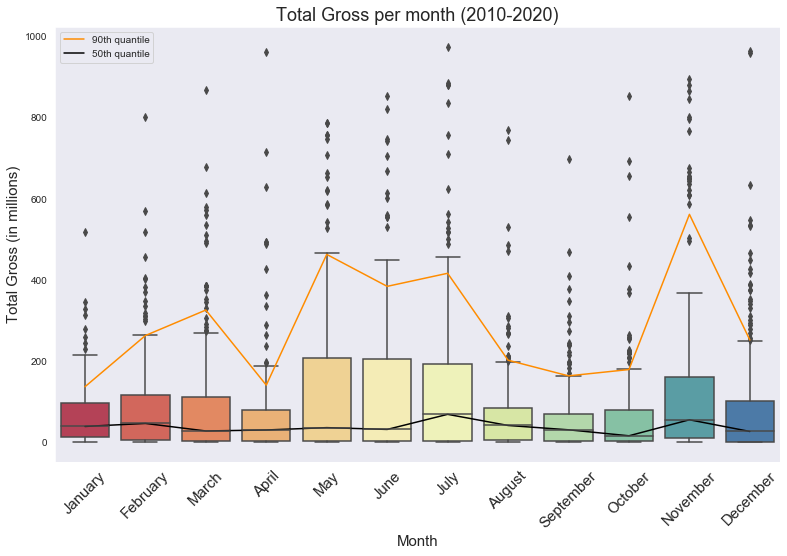

In [18]:
plt.figure(figsize=(13,8))
sns.set_style('dark')
fig9 = sns.boxplot(x='month',y='worldwide_gross',data=month_day_analysis, palette=('Spectral'))

#Our lineplots showing percentages
fig10 = sns.lineplot(x=month_percentile.index,y=month_percentile['worldwide_gross'][0.5],\
                     data=month_percentile, color='k')

fig11 = sns.lineplot(x=month_percentile.index,y=month_percentile['worldwide_gross'][0.90],\
                     data=month_percentile, color='darkorange')

plt.xlabel('Month',size=15)
fig9.set_xticklabels(month_names,rotation=45,fontdict={'fontsize':15})
plt.ylabel('Total Gross (in millions)', size=15)
plt.title("Total Gross per month (2010-2020)",size=18)

import matplotlib.lines as mlines
#This creates our legend lines using an artist
top_line = mlines.Line2D([], [], color='darkorange',markersize=15, label='90th quantile')
bot_line = mlines.Line2D([], [], color='k',markersize=15, label='50th quantile')
plt.legend(handles=[top_line, bot_line])
plt.show()

In [22]:
# Summer movies perform best on average. July is arguably the best month to release a film

# Q6: What is the best Weekday to release a film?

In [23]:
#Gets us lineplots to use once again. 60th percentile is used for unique value, otherwise error will occur
day_percentile = month_day_analysis[['worldwide_gross','weekday']].groupby('weekday').quantile([.60,.90])
day_percentile = day_percentile.unstack()
day_percentile

worldwide_gross            
                    0.6         0.9
weekday                            
0              0.025422   34.465125
1              0.020511   36.925395
2             84.747441  370.468241
3             44.793168  485.464897
4             60.458107  278.551043
5              4.192403  109.990540
6             34.990991  156.815529

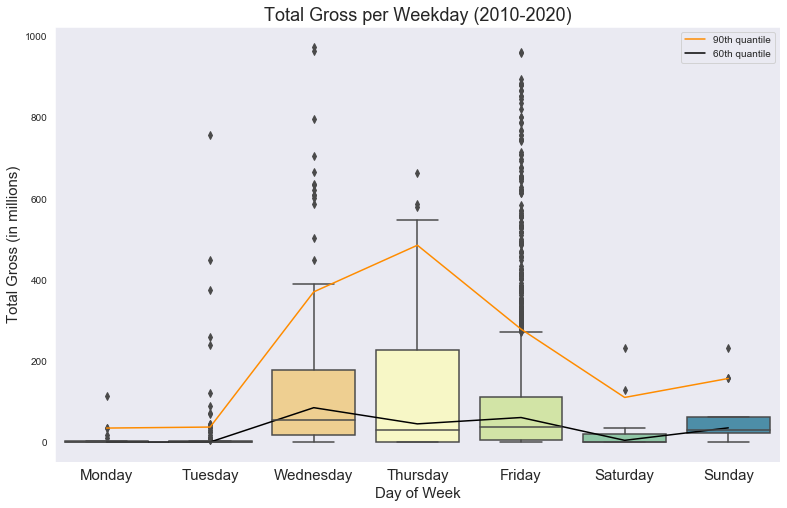

In [24]:
plt.figure(figsize=(13,8))
sns.set_style('dark')
#boxplot of weekdays
fig12 = sns.boxplot(x='weekday',y='worldwide_gross',data=month_day_analysis, palette=('Spectral'))

#creates our lineplots
fig13 = sns.lineplot(x = day_percentile.index, y = day_percentile['worldwide_gross'][0.6],\
                     data = day_percentile, color='k')

fig14 = sns.lineplot(x = day_percentile.index, y = day_percentile['worldwide_gross'][0.9],\
                     data = day_percentile, color='darkorange')

#creates our legend
topp_line = mlines.Line2D([], [], color='darkorange',markersize=15, label='90th quantile')
bott_line = mlines.Line2D([], [], color='k',markersize=15, label='60th quantile')
plt.legend(handles=[topp_line, bott_line])


plt.xlabel('Day of Week',size=15)
fig12.set_xticklabels(day_names,fontdict={'fontsize':15})
plt.ylabel('Total Gross (in millions)', size=15)
plt.title("Total Gross per Weekday (2010-2020)",size=18)
plt.show()